Disciplina: **Mineração de Dados**

Professor: **Wilson Castello Branco Neto**

Aula 11 - Agrupamento

Nome: Wilson Castello Branco Neto

Exemplo 1: K-means.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cria e apresenta um dataframe com seis registros. Seus atributos são as posições de cada ponto nos eixos X e Y.

In [2]:
df = pd.DataFrame([[1, 2], [2, 2], [3, 1],[10, 3], [8, 4], [9, 5]], columns=['X', 'Y'])

print(df)

    X  Y
0   1  2
1   2  2
2   3  1
3  10  3
4   8  4
5   9  5


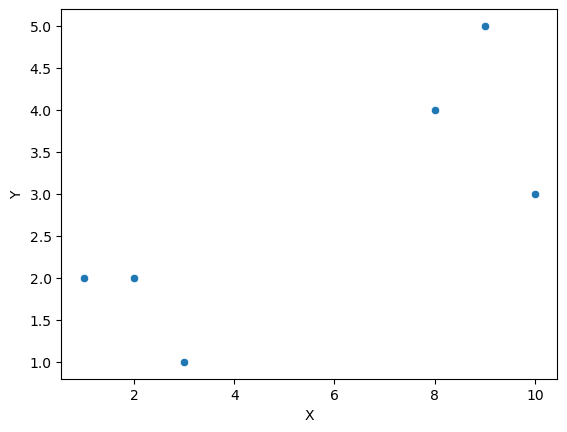

In [3]:
sns.scatterplot(data=df, x='X', y='Y')
plt.show()

Cria um objeto da classe KMeans, com dois clusters para agrupar os registros.

O atributo **n_init** representa quantas inicializações aleatórias serão feitas para os centróides, até que a solução seja apresentada. A solução com menor erro entre todas as tentadas é retornada.

Por fim apresenta o rótulo de cada ponto.

In [4]:
from sklearn.cluster import KMeans

modelo = KMeans(n_clusters=2, random_state=0, n_init=5)
modelo.fit(df)

print(modelo.labels_)

[1 1 1 0 0 0]


c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cria um novo atributo no dataframe, denominado grupo que recebe o resultado do algoritmos k-means. Em seguida, apresenta o diagrama de dispersão com os pontos coloridos de acordo com o resultado do k-means.

In [5]:
df['Grupo'] = modelo.labels_
df['Grupo'] = df['Grupo'].astype(str)

print(df)

    X  Y Grupo
0   1  2     1
1   2  2     1
2   3  1     1
3  10  3     0
4   8  4     0
5   9  5     0


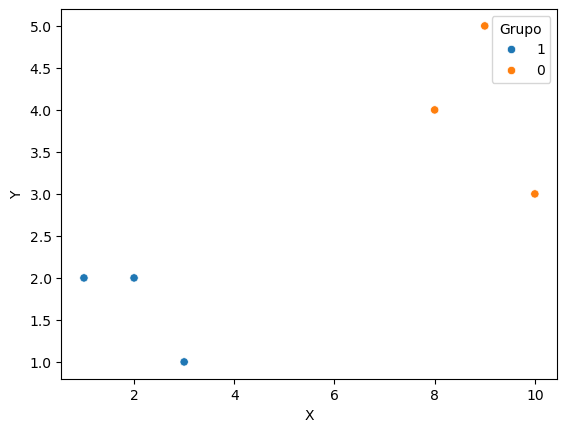

In [6]:
sns.scatterplot(data=df, x='X', y='Y', hue='Grupo')
plt.show()

Utiliza o método predict para identificar em quais grupos dois novos pontos devem ser alocados e apresenta os resultados.

In [7]:
resultado = modelo.predict([[1, 1], [7, 3.5]])

print(resultado)

[1 0]


c:\Users\bruno\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


Acrescenta no dataframe os dois novos pontos com o resultado do k-means apresentado anteriormente e apresenta o gráfico com os novos pontos.

In [8]:
df.loc[len(df.index)] = [1, 1, '1']
df.loc[len(df.index)] = [7, 3.5, '0']
print(df)

    X    Y Grupo
0   1  2.0     1
1   2  2.0     1
2   3  1.0     1
3  10  3.0     0
4   8  4.0     0
5   9  5.0     0
6   1  1.0     1
7   7  3.5     0


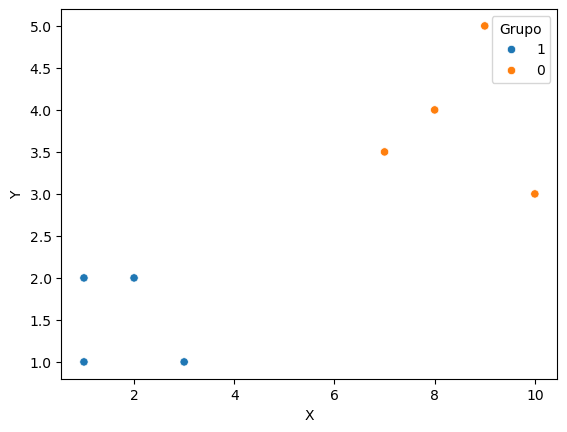

In [9]:
sns.scatterplot(data=df, x='X', y='Y', hue='Grupo')
plt.show()

Mostra o valor dos centróides dos grupos e apresenta-os no gráfico.

In [10]:
centroides = modelo.cluster_centers_
print(centroides)

[[9.         4.        ]
 [2.         1.66666667]]


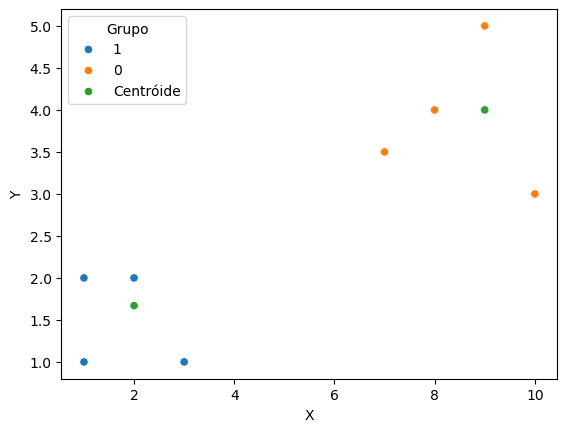

In [11]:
df.loc[len(df.index)] = [9, 4, 'Centróide']
df.loc[len(df.index)] = [2, 1.67, 'Centróide']
sns.scatterplot(data=df, x='X', y='Y', hue='Grupo')
plt.show()